In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import Birch
from scipy.cluster.hierarchy import dendrogram , linkage

from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

In [2]:
data = pd.read_csv('/Users/anastasiakucina/project/ML_course/data/archive/CC GENERAL.csv')
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

## EASY

In [3]:
# чтобы подобрать признаки для кластеризации, посмотрим на попарнуб корреляцию фичей 
# - чтобы лучше кластеризовать возьмем те, что меньше всего коррелируют 
intresting_columns= ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

In [4]:
data[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']].corr(method='kendall')

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.429865   0.022283   
BALANCE_FREQUENCY                 0.429865           1.000000   0.116985   
PURCHASES                         0.022283           0.116985   1.000000   
ONEOFF_PURCHASES                  0.107438           0.110422   0.638578   
INSTALLMENTS_PURCHASES           -0.056408           0.104044   0.597724   
CASH_ADVANCE                      0.427766           0.112072  -0.285367   
PURCHASES_FREQUENCY              -0.099849           0.172463   0.639669   
ONEOFF_PURCHASES_FREQUENCY        0.087822           0.133722   0.552593   
PURCHASES_INSTALLMENTS_FREQUENCY -0.102973           0.130029   0.470291   
CASH_ADVANCE_FREQUENCY            0.411702           0.148309  -0.293097   
CASH_ADVANCE_TRX                  0.415059           0.147094  -0.287084   
PURCHASES_TRX                    -0.023590           0.164722   0.736706   
CREDIT_LIMIT                      0.274126           0.082571   0.183127   
PAYMENTS                          0.304185           0.159003   0.299525   
MINIMUM_PAYMENTS                  0.735030           0.392653  -0.000130   
PRC_FULL_PAYMENT                 -0.371380          -0.152191   0.183172   
TENURE                            0.052170           0.210089   0.107153   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.107438               -0.056408   
BALANCE_FREQUENCY                         0.110422                0.104044   
PURCHASES                                 0.638578                0.597724   
ONEOFF_PURCHASES                          1.000000                0.153175   
INSTALLMENTS_PURCHASES                    0.153175                1.000000   
CASH_ADVANCE                             -0.143960               -0.275549   
PURCHASES_FREQUENCY                       0.347428                0.640452   
ONEOFF_PURCHASES_FREQUENCY                0.840209                0.143309   
PURCHASES_INSTALLMENTS_FREQUENCY          0.092729                0.791367   
CASH_ADVANCE_FREQUENCY                   -0.141403               -0.286028   
CASH_ADVANCE_TRX                         -0.137589               -0.278615   
PURCHASES_TRX                             0.469124                0.637147   
CREDIT_LIMIT                              0.225575                0.089233   
PAYMENTS                                  0.272942                0.179398   
MINIMUM_PAYMENTS                          0.051121               -0.034240   
PRC_FULL_PAYMENT                          0.039335                0.222864   
TENURE                                    0.082024                0.105122   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.427766            -0.099849   
BALANCE_FREQUENCY                     0.112072             0.172463   
PURCHASES                            -0.285367             0.639669   
ONEOFF_PURCHASES                     -0.143960             0.347428   
INSTALLMENTS_PURCHASES               -0.275549             0.640452   
CASH_ADVANCE                          1.000000            -0.346296   
PURCHASES_FREQUENCY                  -0.346296             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.149377             0.409792   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.296057             0.763238   
CASH_ADVANCE_FREQUENCY                0.816530            -0.351196   
CASH_ADVANCE_TRX                      0.835921            -0.344998   
PURCHASES_TRX                        -0.304495             0.815994   
CREDIT_LIMIT                          0.125540             0.075695   
PAYMENTS                              0.192930             0.123269   
MINIMUM_PAYMENTS                      0.359985            -0.069658   
PRC_FULL_PAYMENT                     -0.214606             0.233808   
TENURE                               -0.096840        

In [5]:
intresting_columns= ['BALANCE', 'PURCHASES',
       'INSTALLMENTS_PURCHASES',
       'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'TENURE']

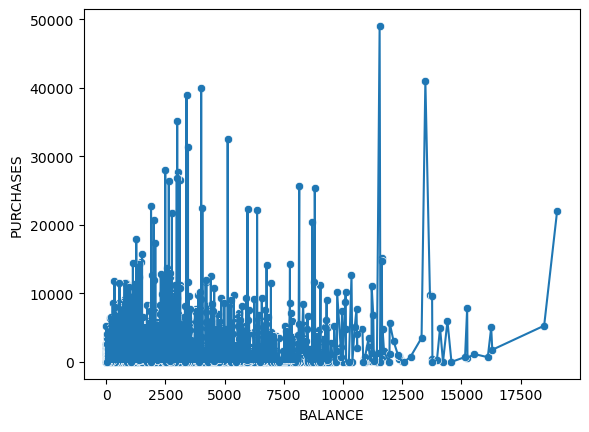

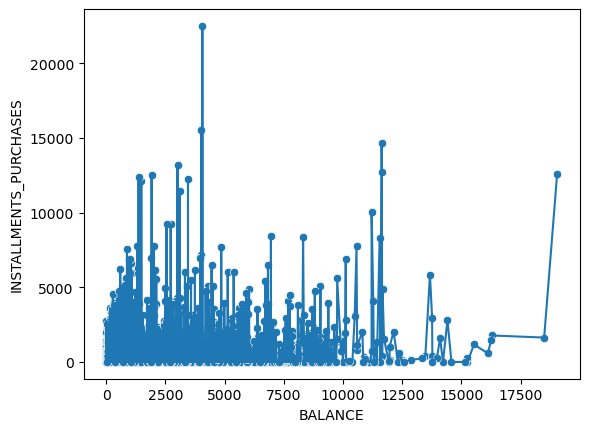

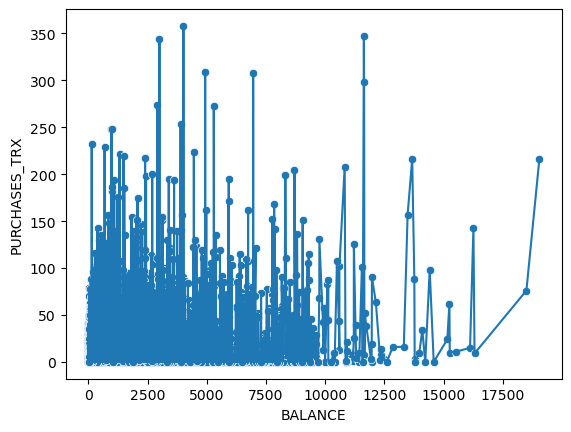

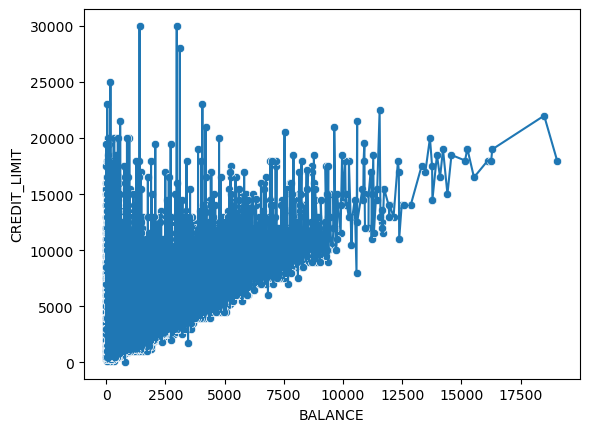

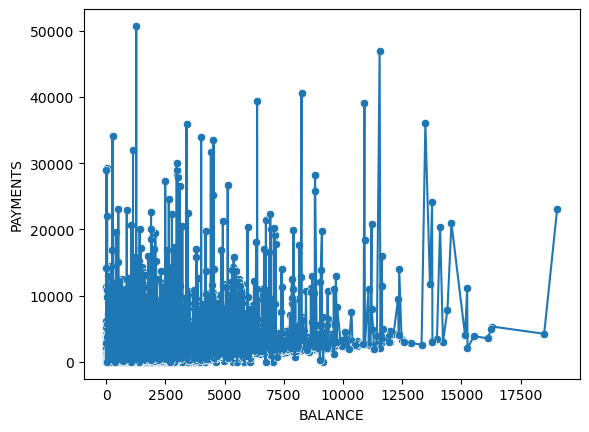

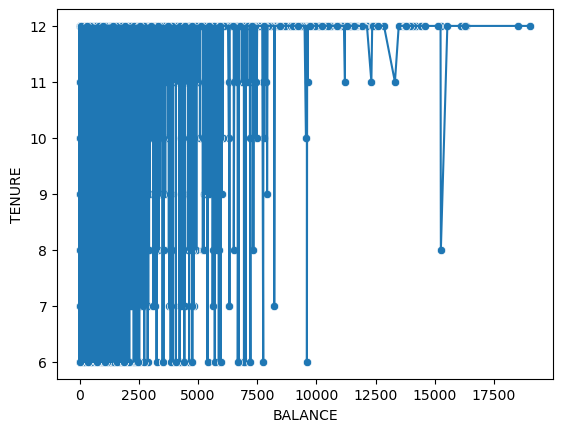

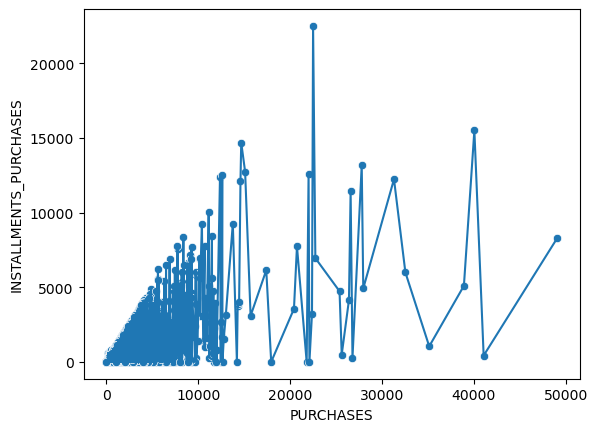

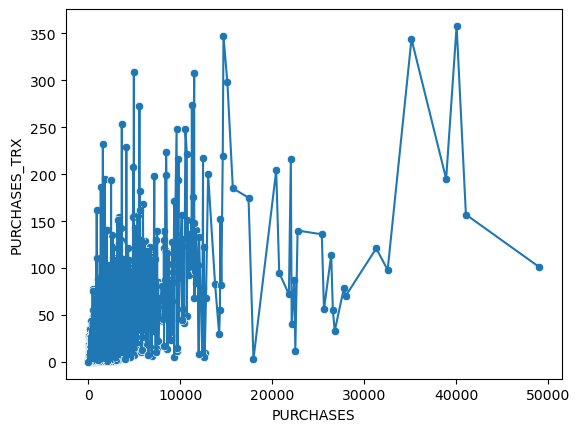

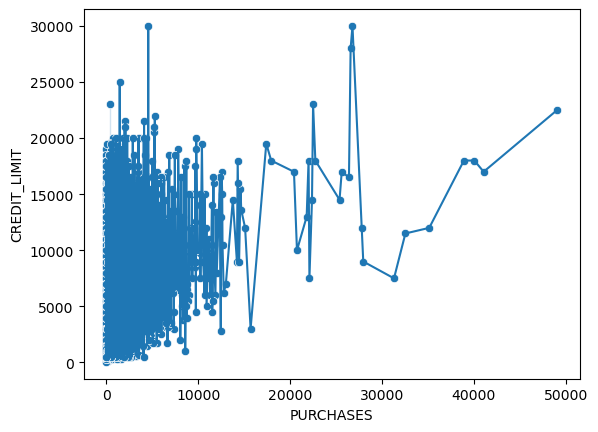

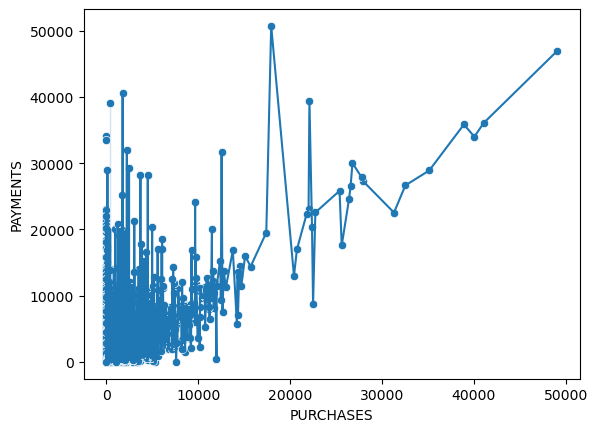

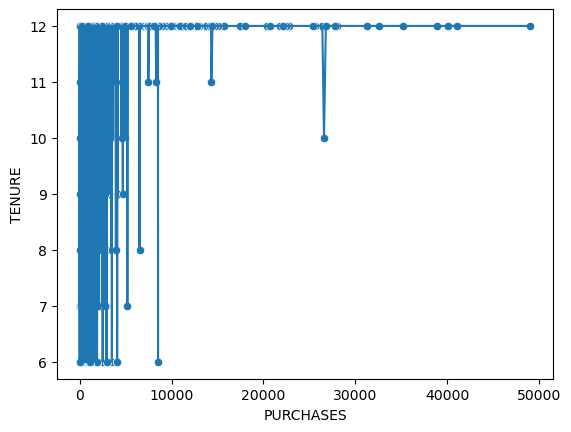

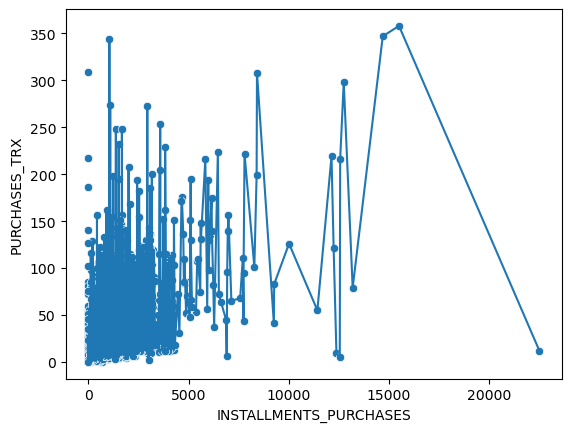

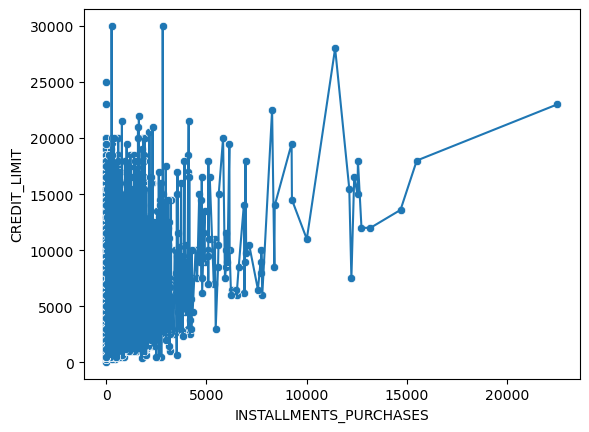

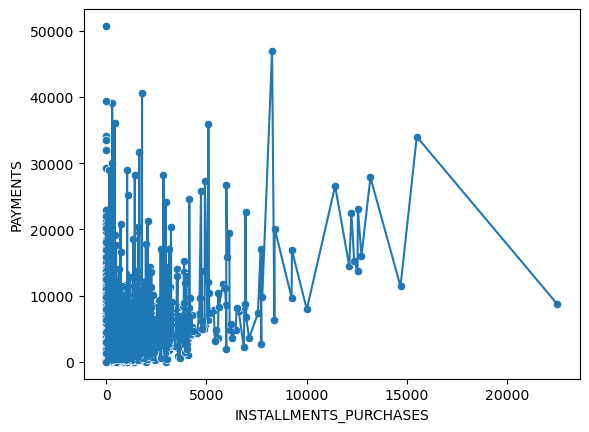

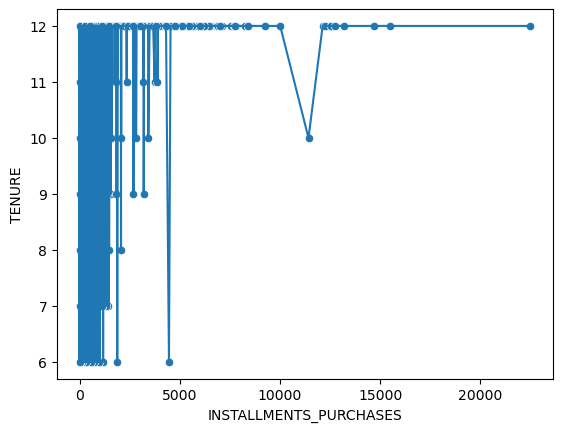

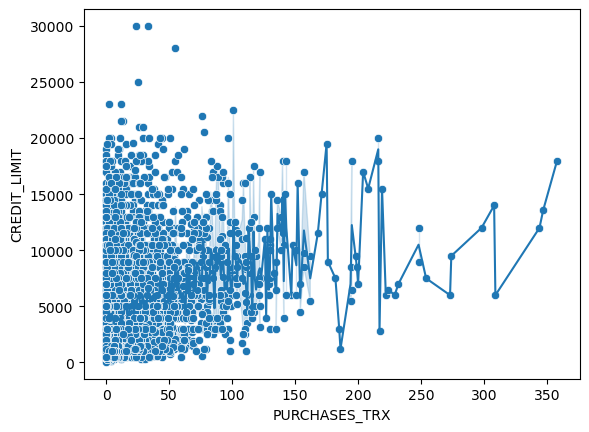

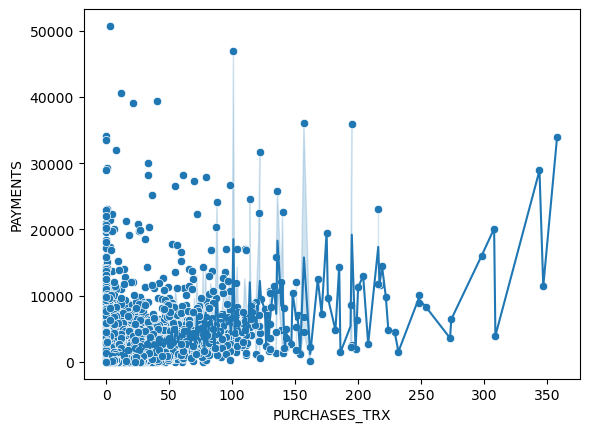

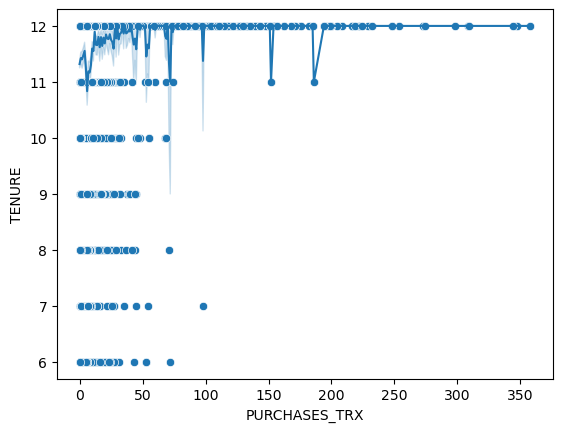

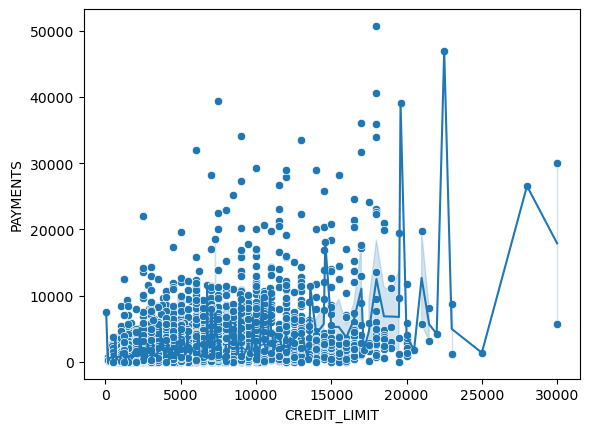

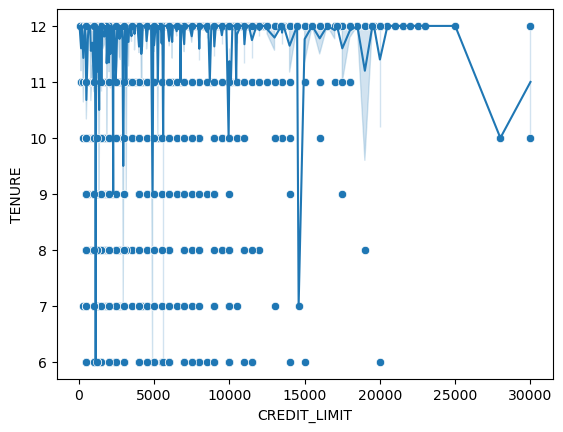

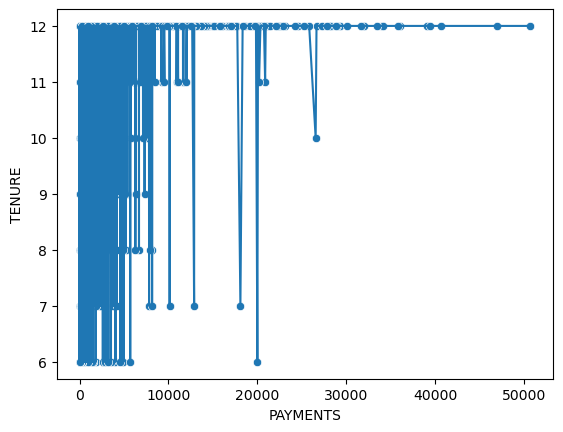

In [6]:
for i in range(len(intresting_columns)):
    for j in range(i+1, len(intresting_columns)):
        sns.lineplot(data=data, x=intresting_columns[i], y=intresting_columns[j])
        sns.scatterplot(data=data, x=intresting_columns[i], y=intresting_columns[j])
        plt.show()

##### Микро-вывод

- Среди оставшихся фичей нет сильной корреляции, поэтому имеет смысл кластеризовать по ним -- но для лучшей кластеризации нужно будет попробовать разные методы, сделаем это в следующем задании :)

In [7]:
# first try of claterization
def distance_by_n(x, n):
    model = KMeans(n_clusters=n)
    model.fit(x)
    return model.inertia_

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
data.dropna(inplace = True)

/Users/anastasiakucina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/anastasiakucina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/anastasiakucina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/anastasiakucina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The defa

Text(0.5, 1.0, 'Elbow method')

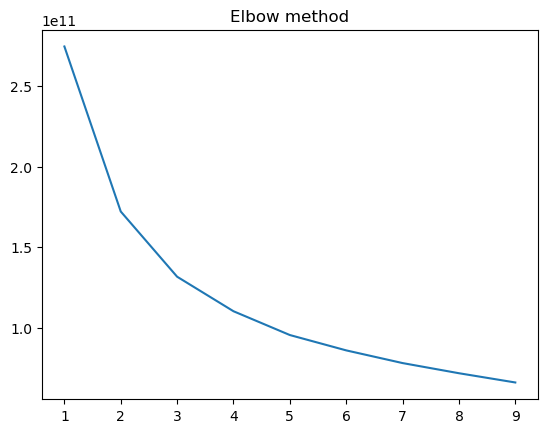

In [10]:
distances = [distance_by_n(data[intresting_columns], n) for n in range(1, 10)]
plt.plot(range(1, 10), distances)
plt.title('Elbow method')

/Users/anastasiakucina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


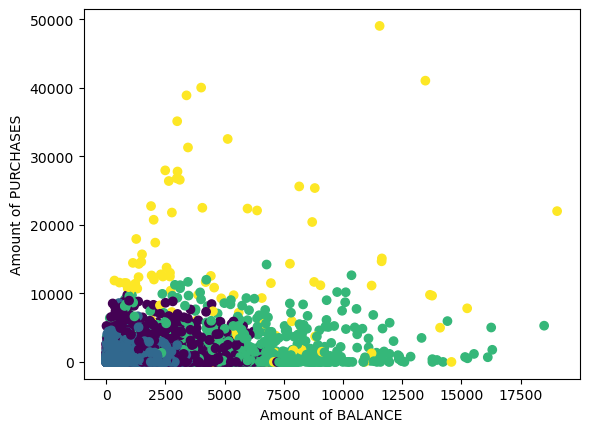

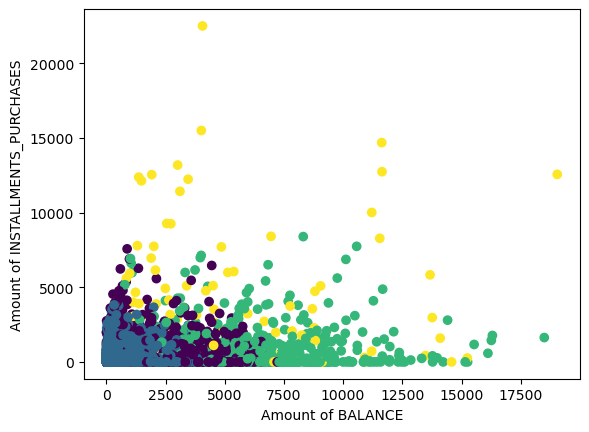

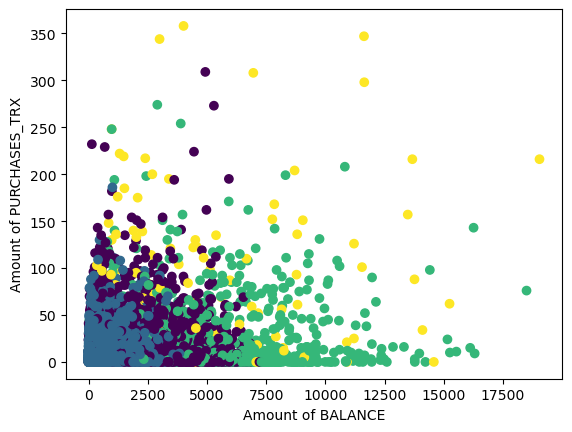

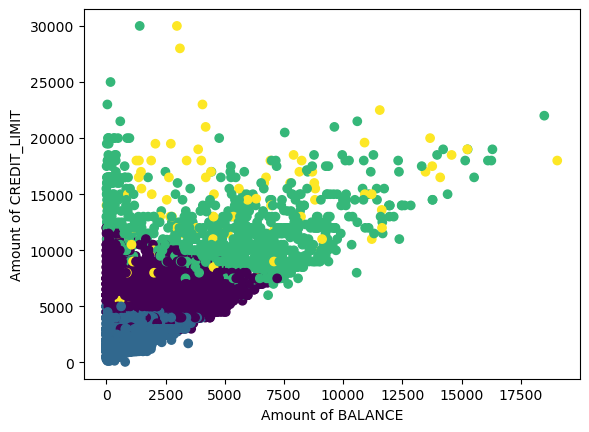

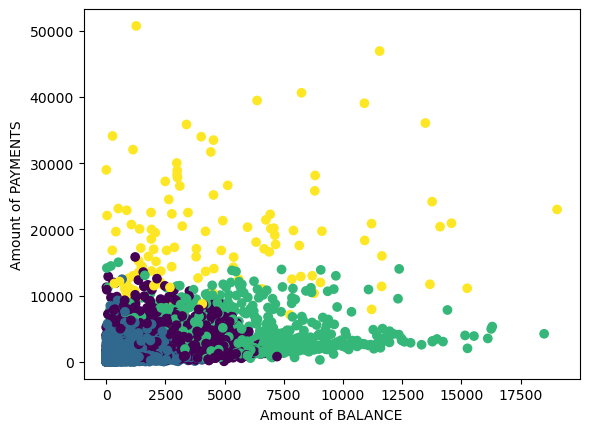

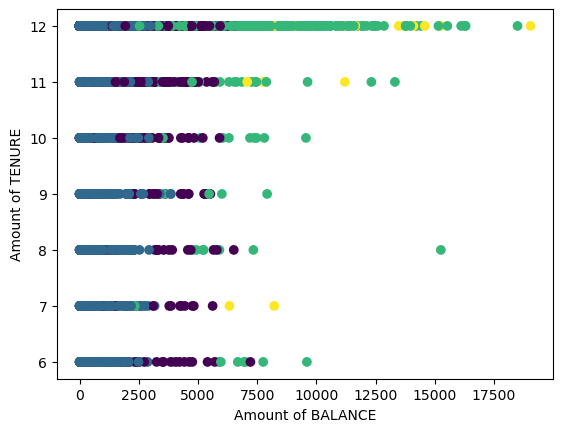

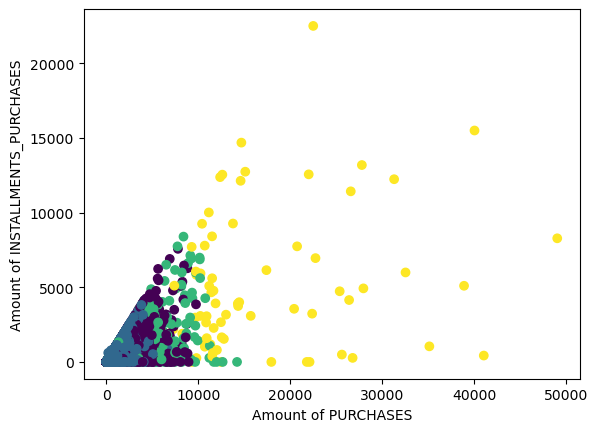

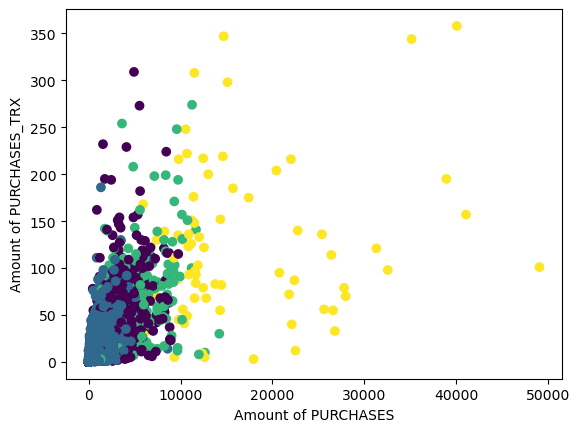

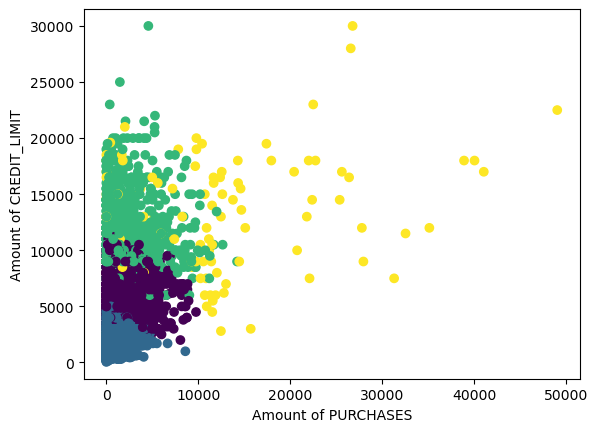

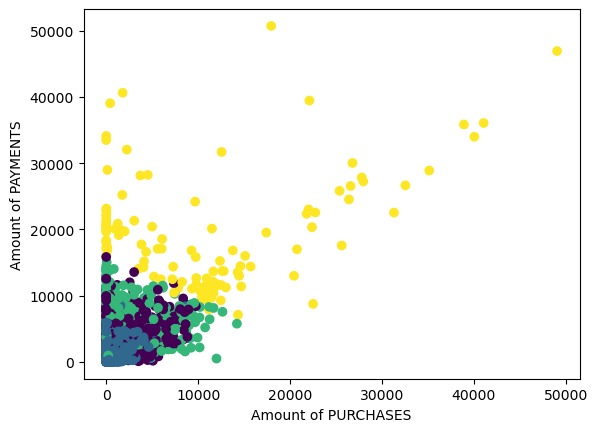

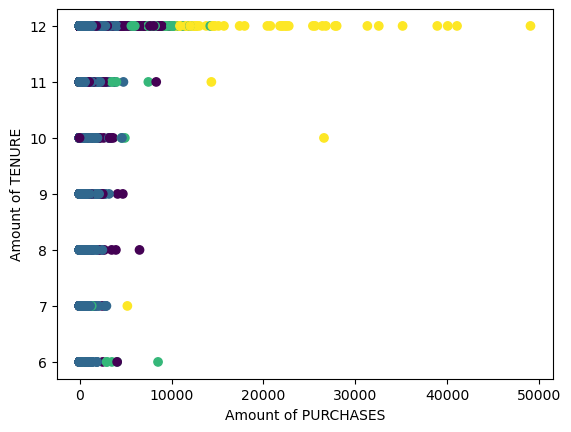

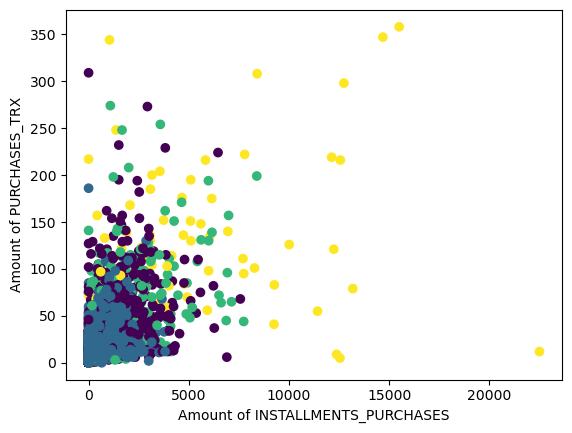

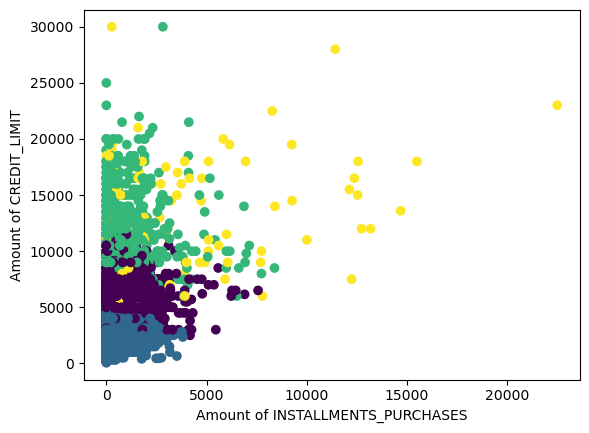

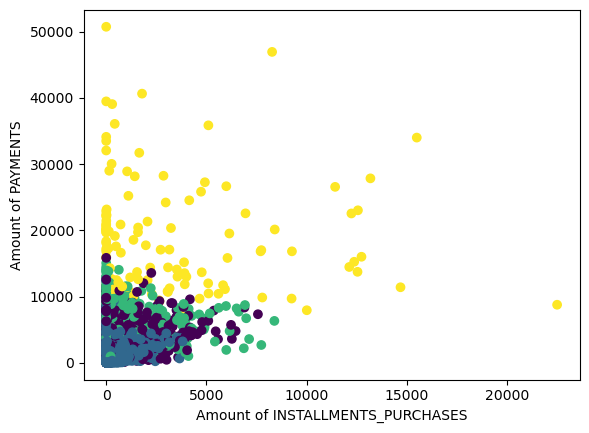

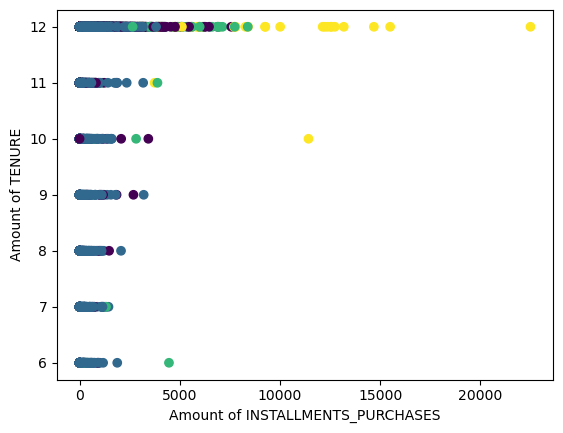

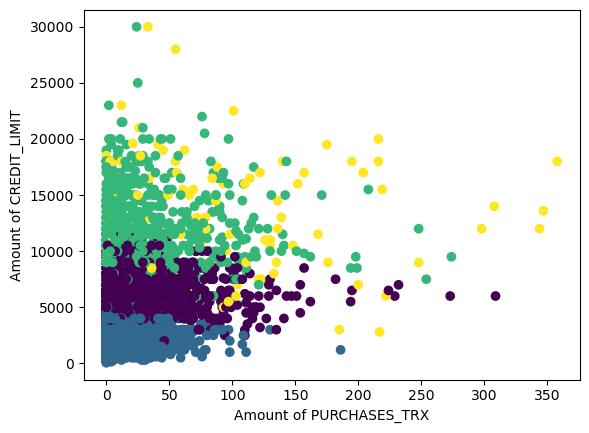

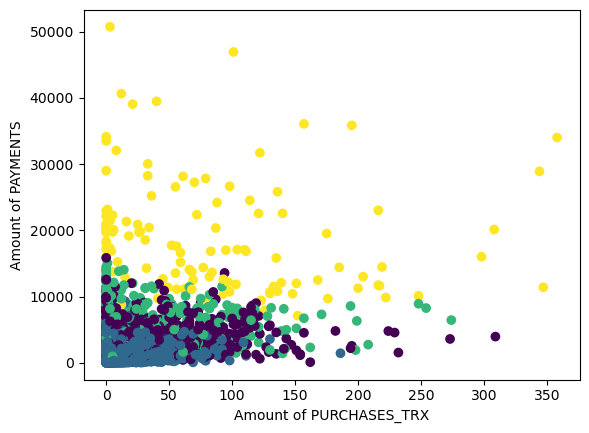

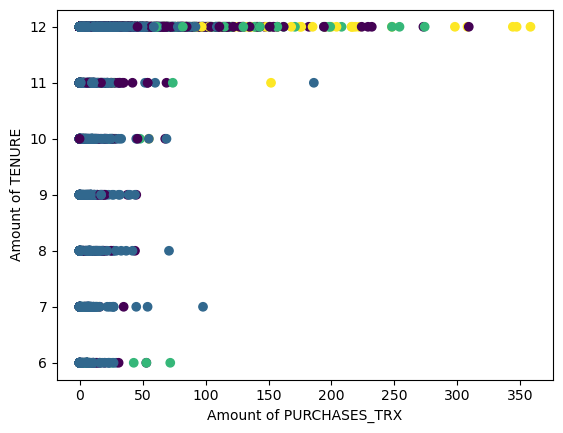

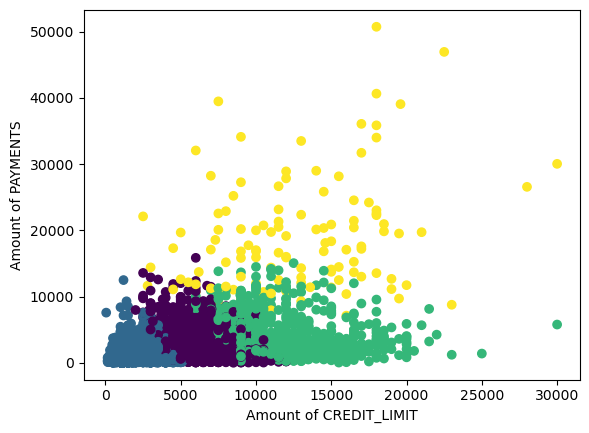

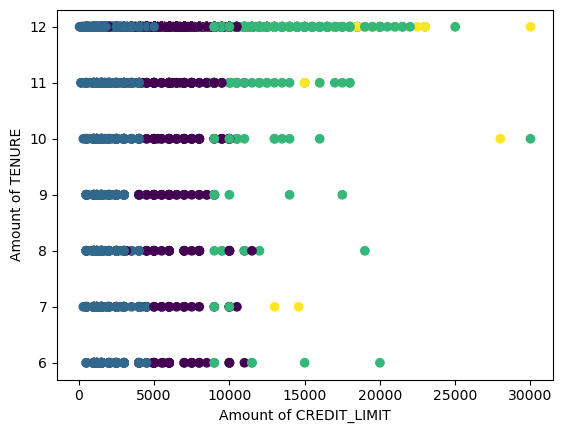

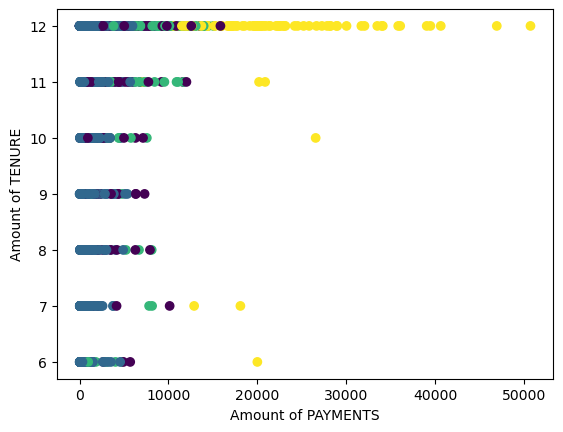

In [11]:
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(data[intresting_columns])

# Визуализируем результаты кластеризации по двум признакам
for i in range(len(intresting_columns)):
    for j in range(i+1, len(intresting_columns)):
        plt.scatter(data[intresting_columns[i]], data[intresting_columns[j]], c=clusters, cmap='viridis')
        plt.xlabel('Amount of %s' % intresting_columns[i])
        plt.ylabel('Amount of %s' % intresting_columns[j])
        plt.show()

#### Вывод на глаз:

- по большинству парных графиков видно, что разделение на кластеры неплохое - если смотреть по диагоняли снизу слева -> наверх вправо 

## MEDIUM

In [13]:
methods = {
    'DBSCAN' : DBSCAN(eps=5, min_samples=100),
    'AffinityPropagation' : AffinityPropagation(random_state=42),
    'Birch' : Birch(n_clusters=None)
}

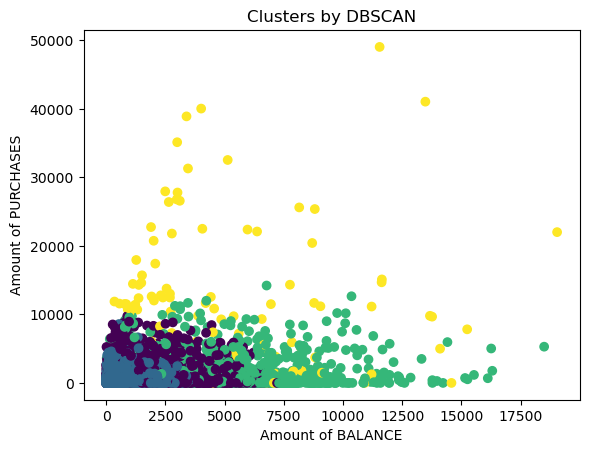

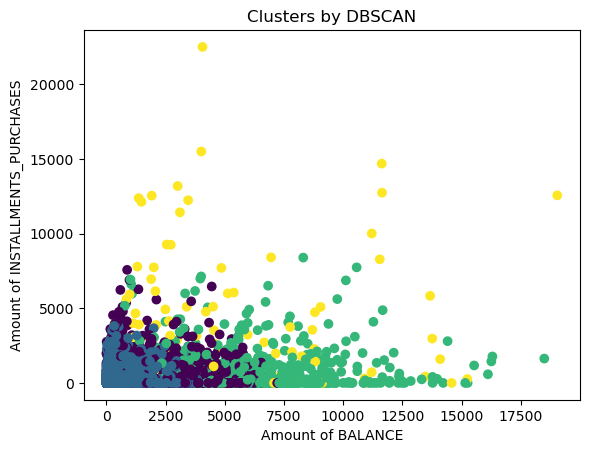

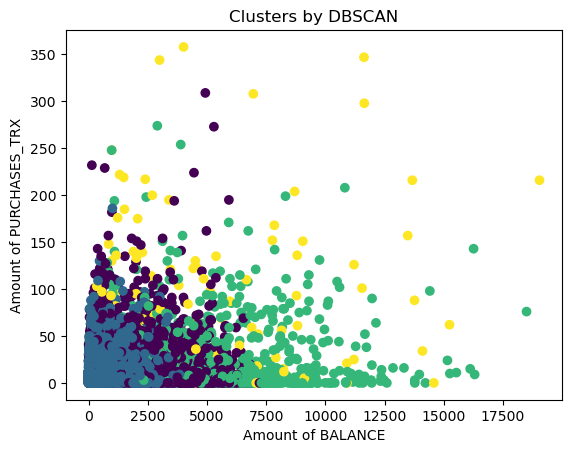

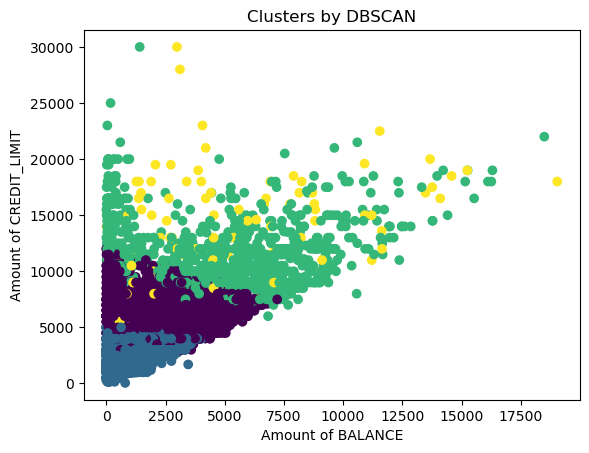

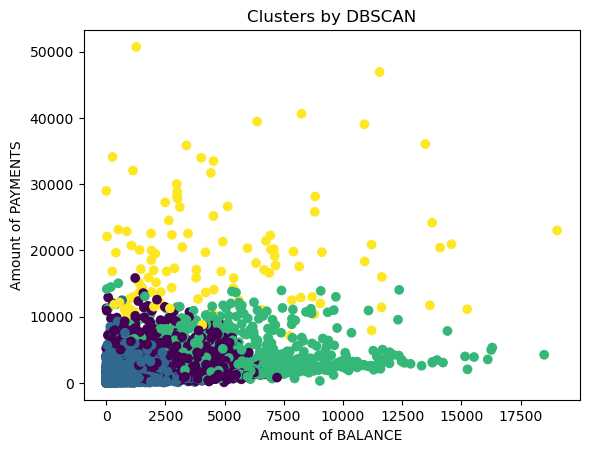

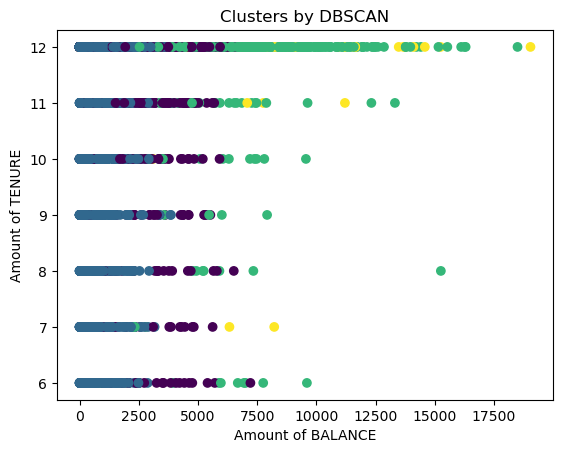

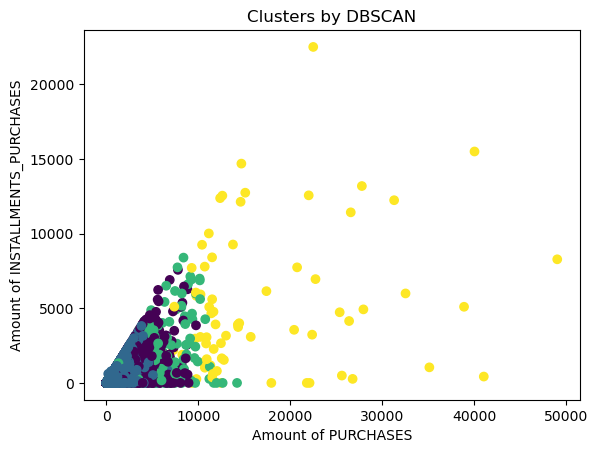

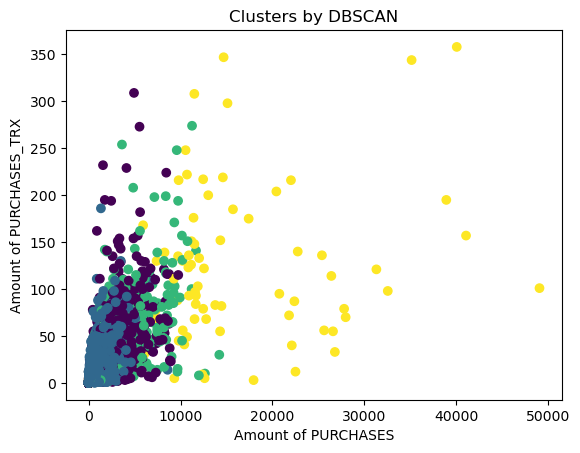

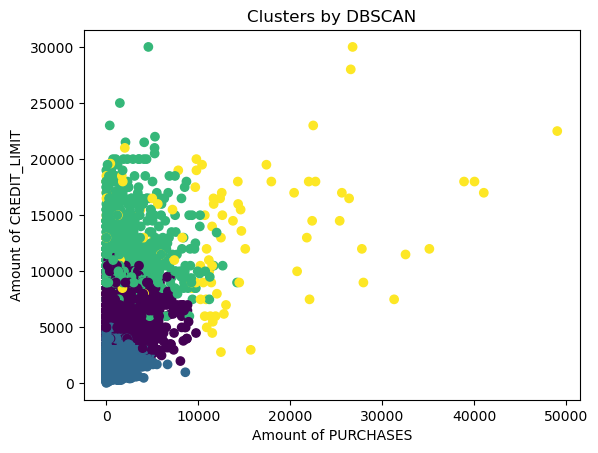

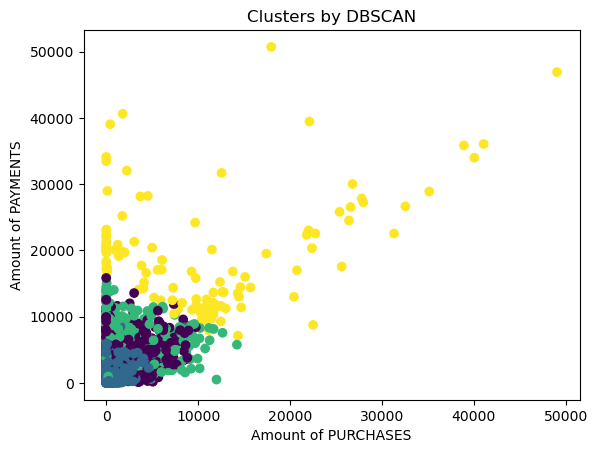

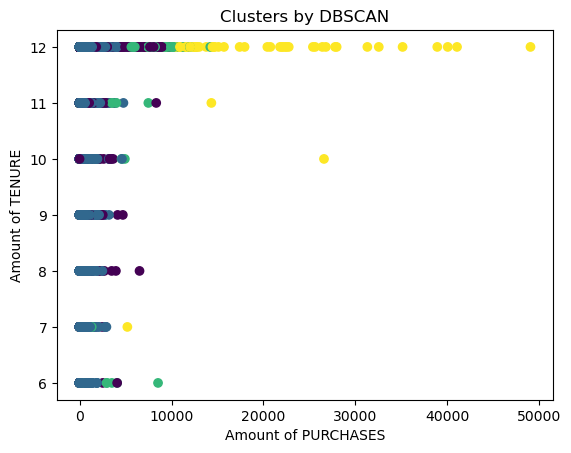

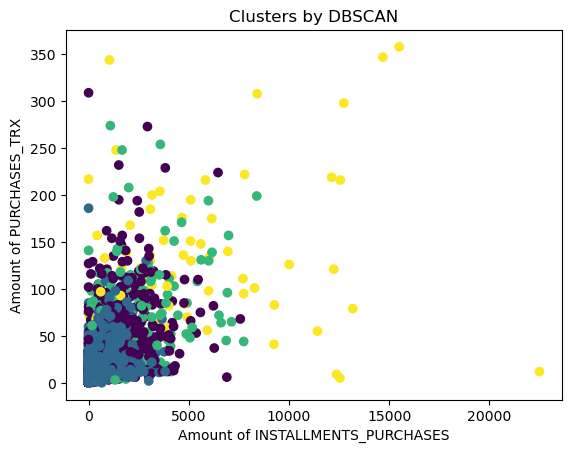

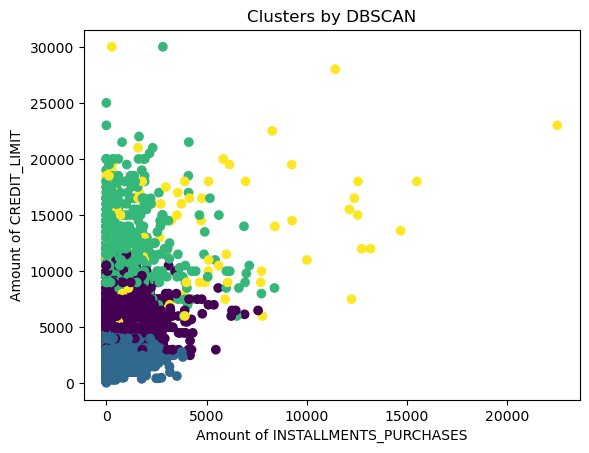

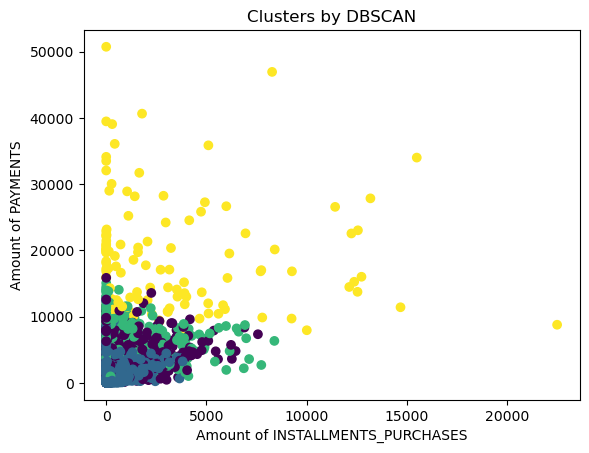

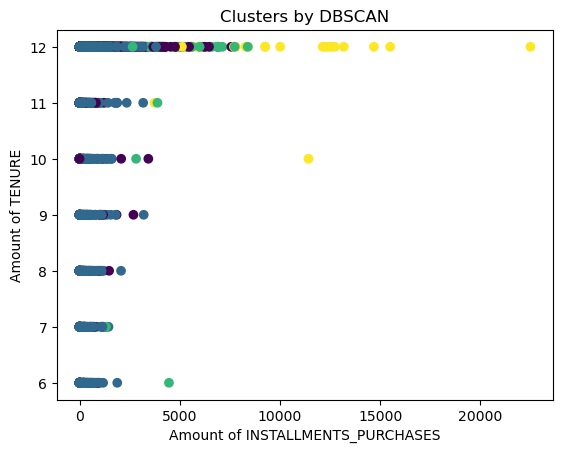

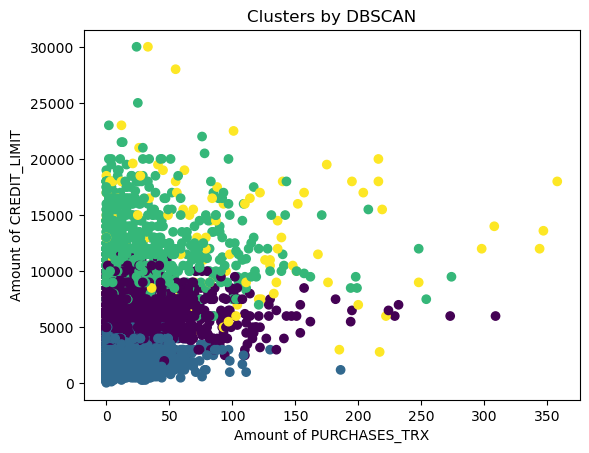

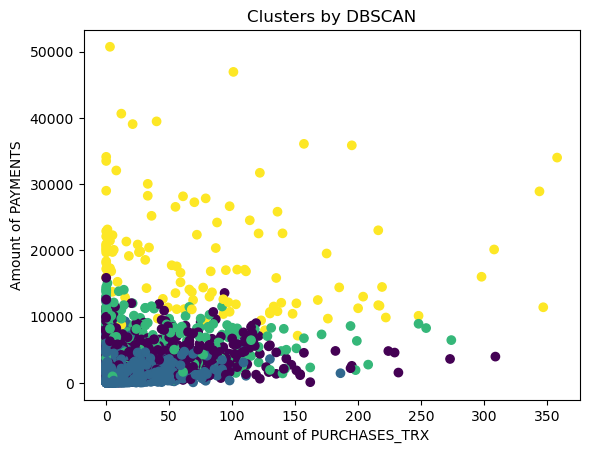

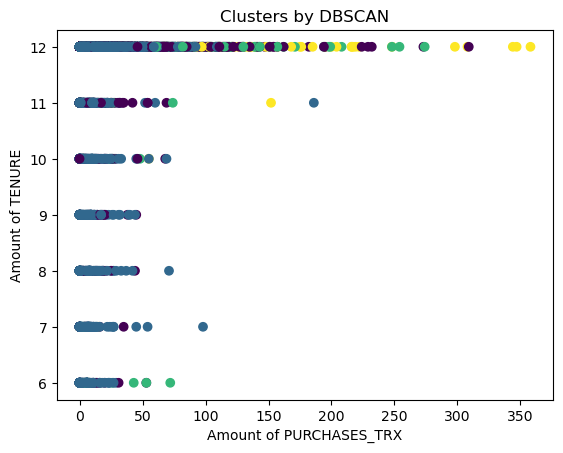

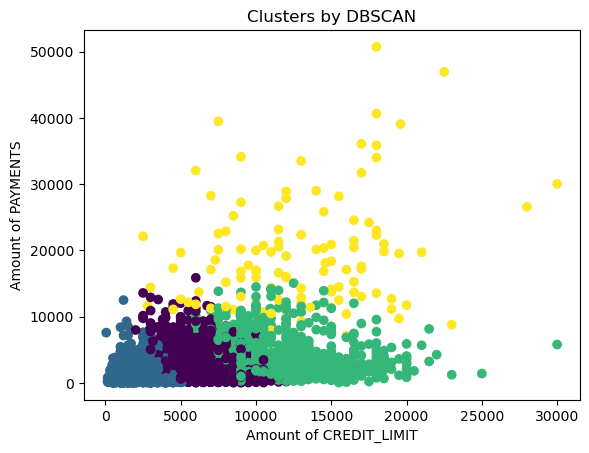

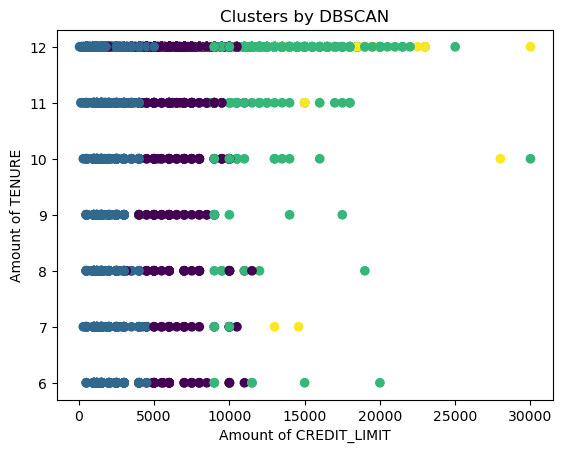

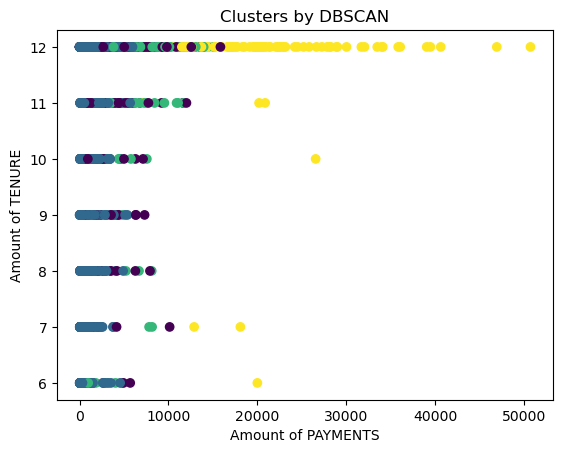

/Users/anastasiakucina/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


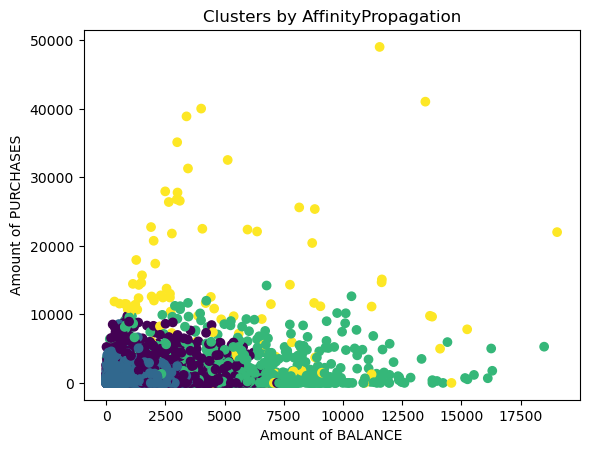

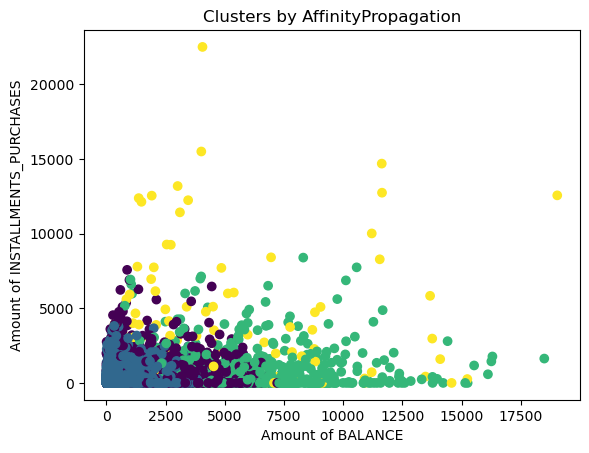

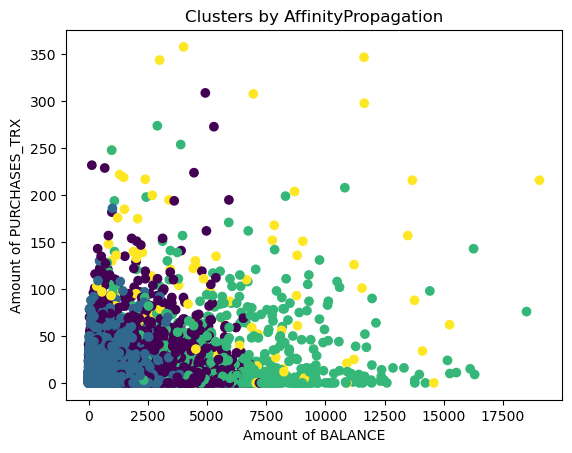

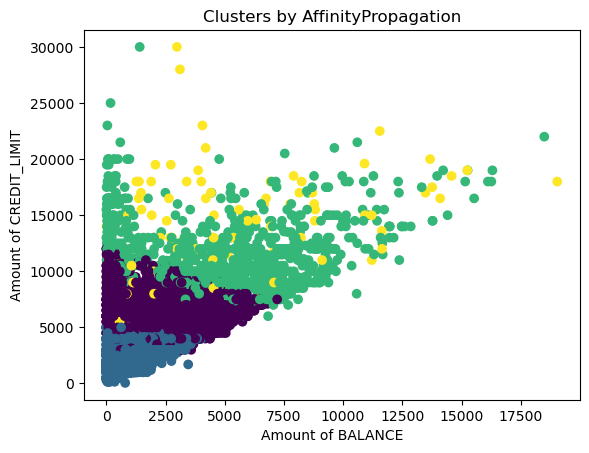

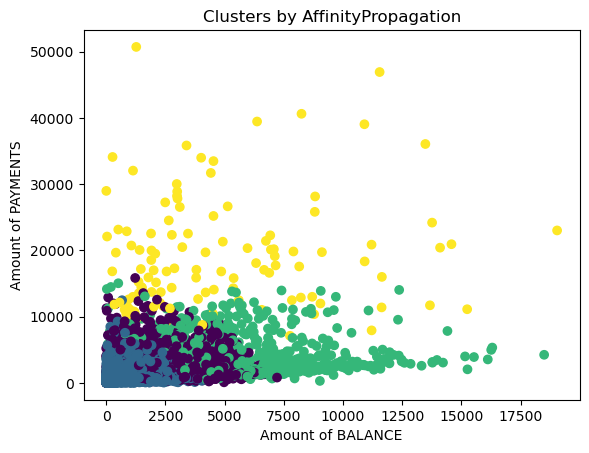

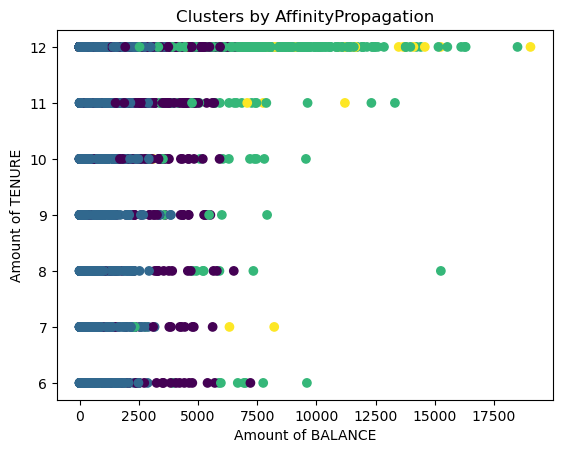

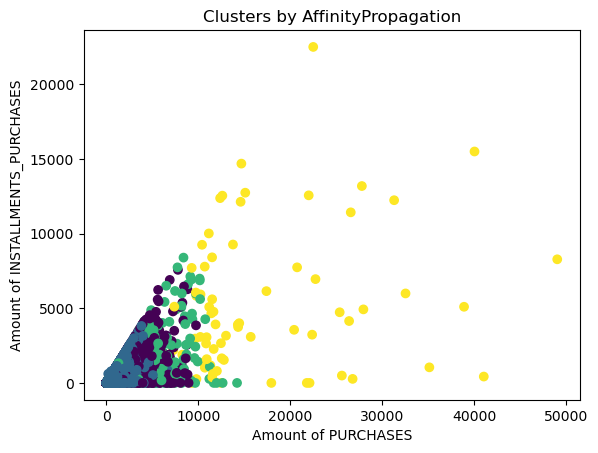

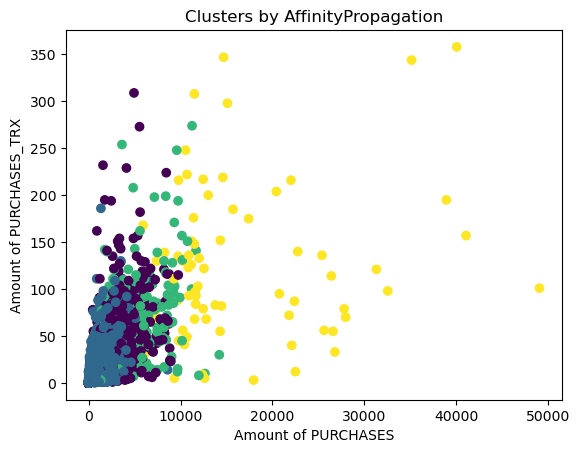

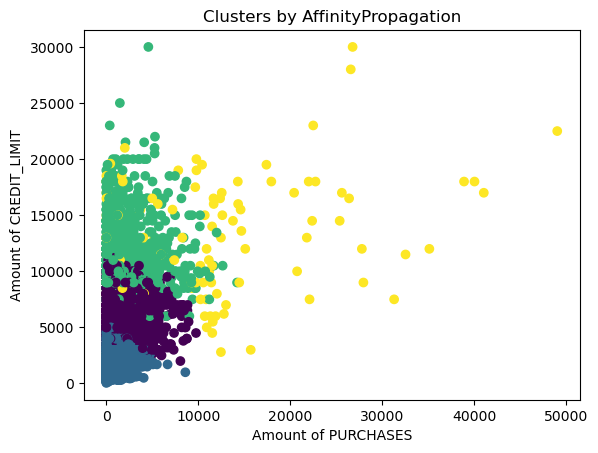

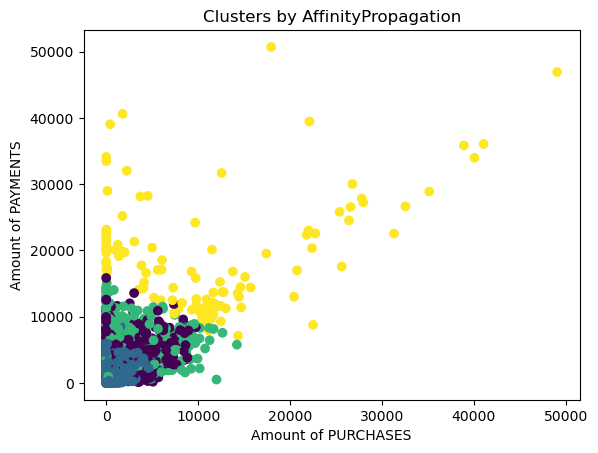

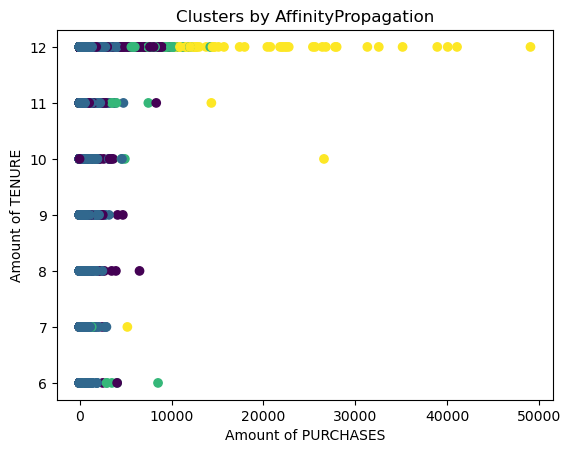

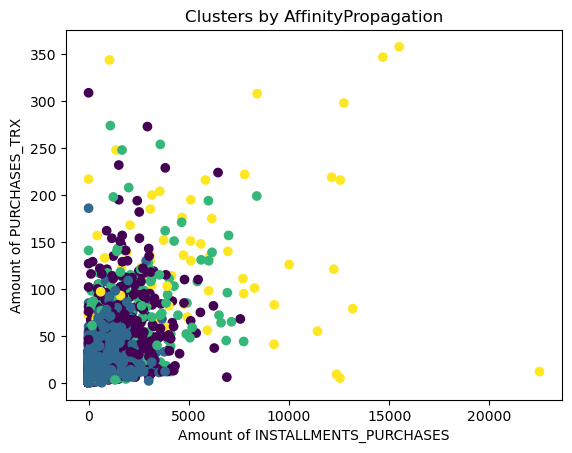

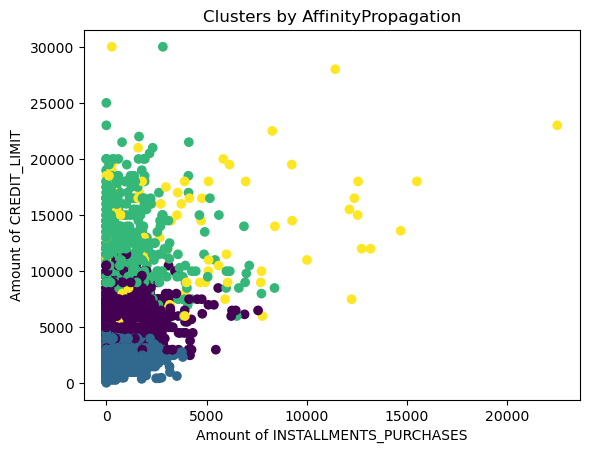

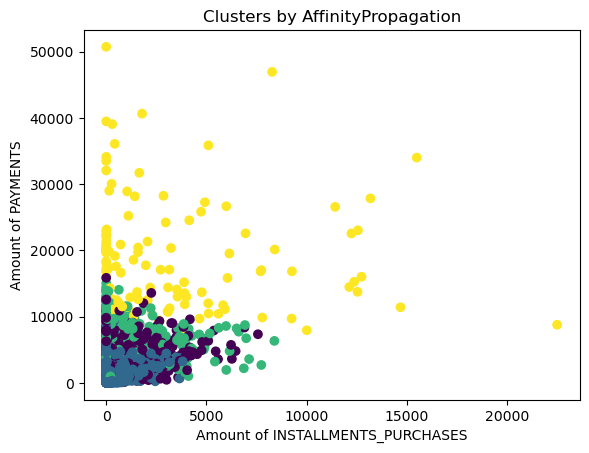

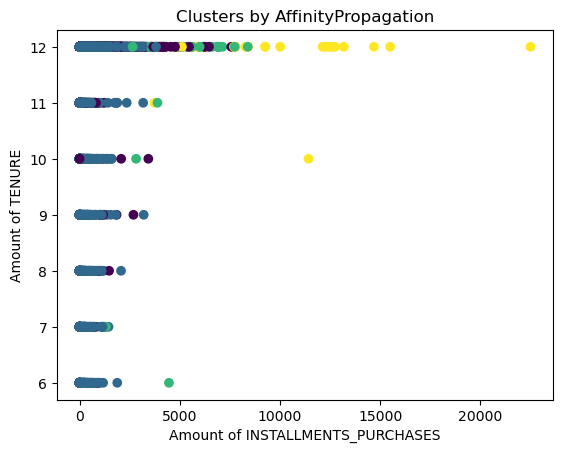

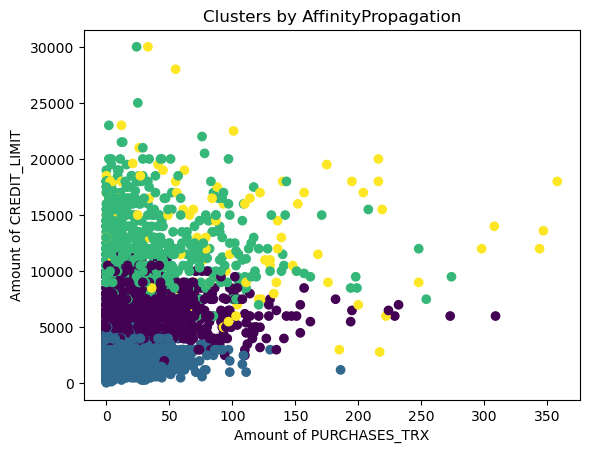

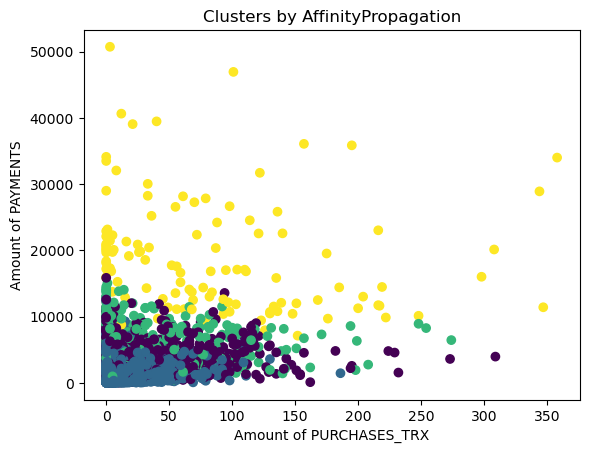

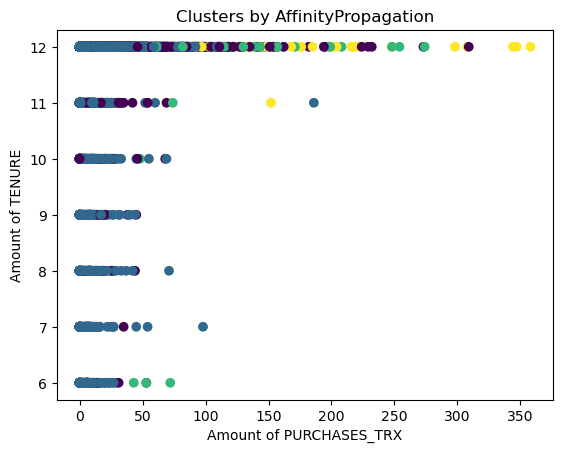

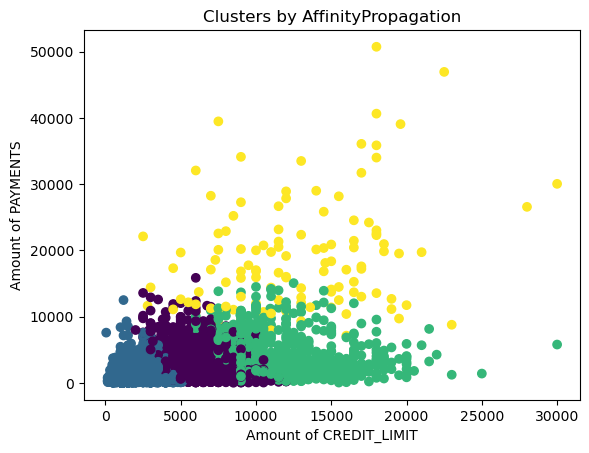

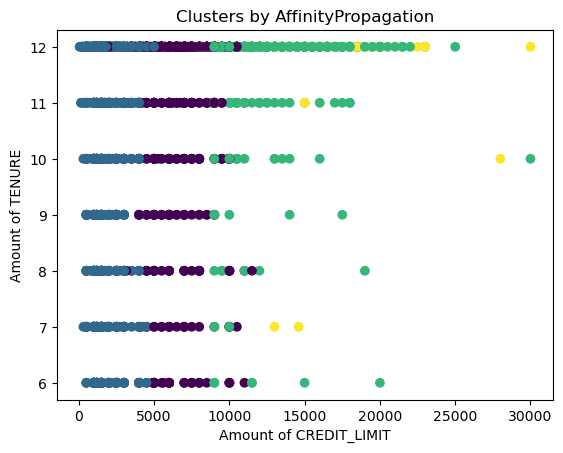

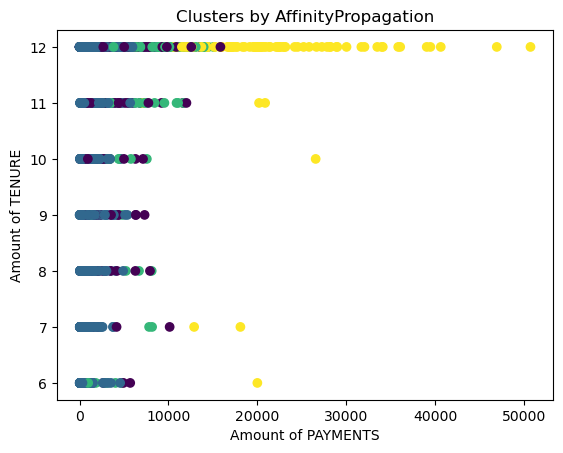

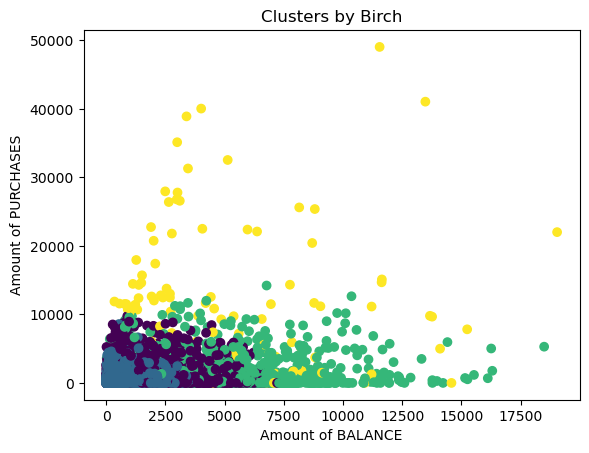

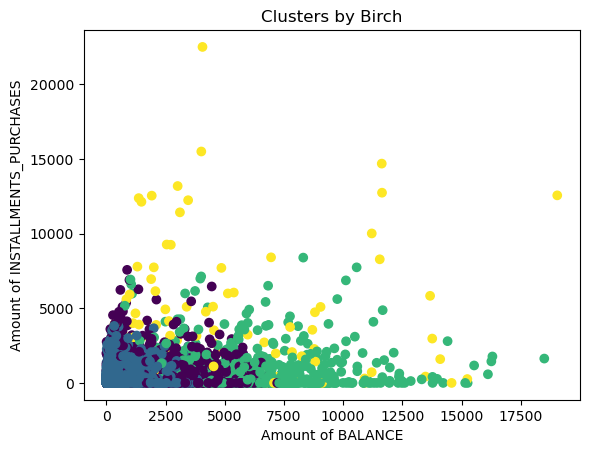

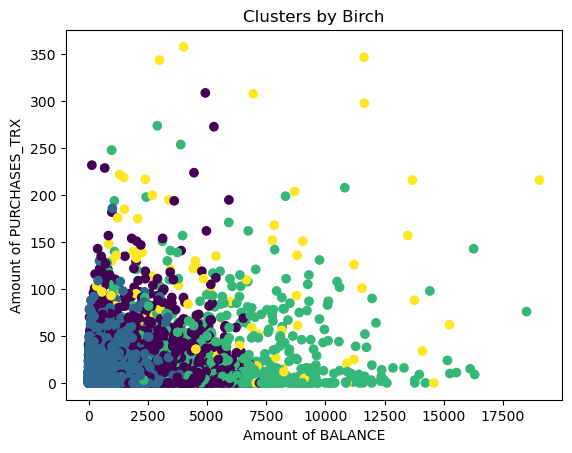

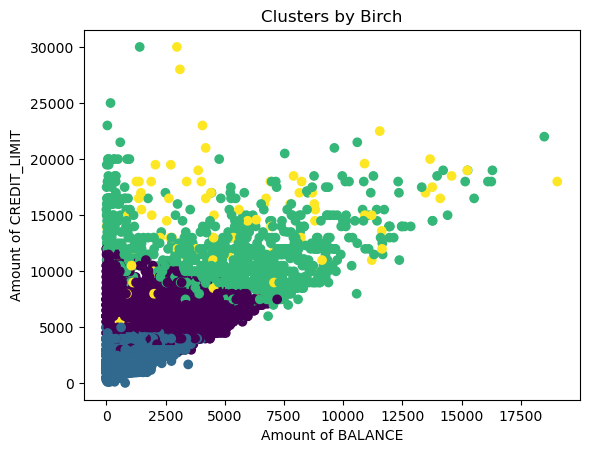

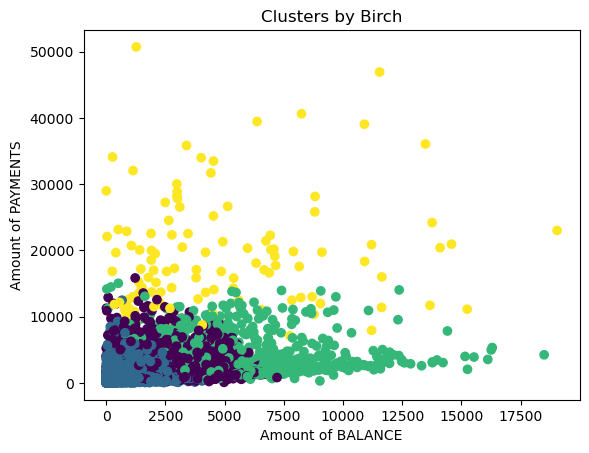

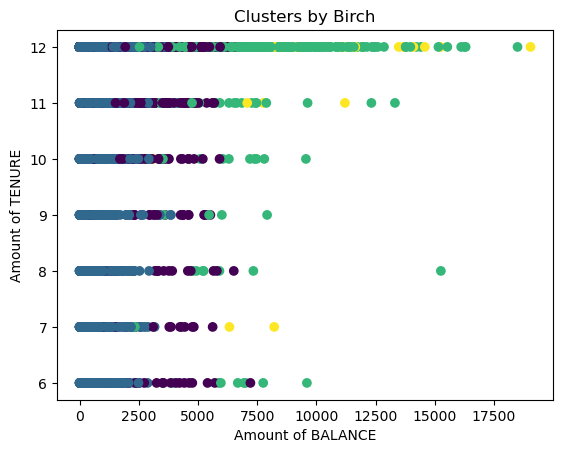

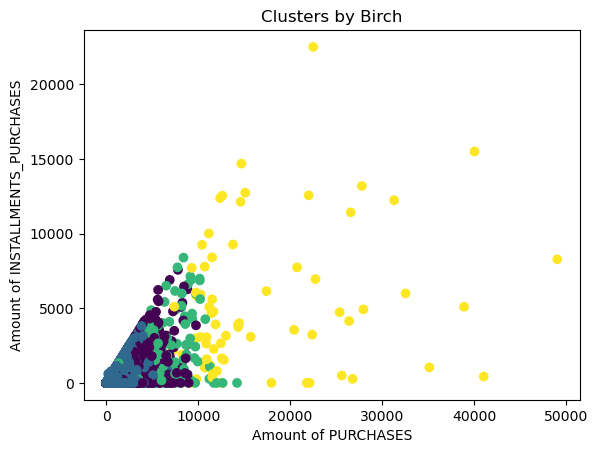

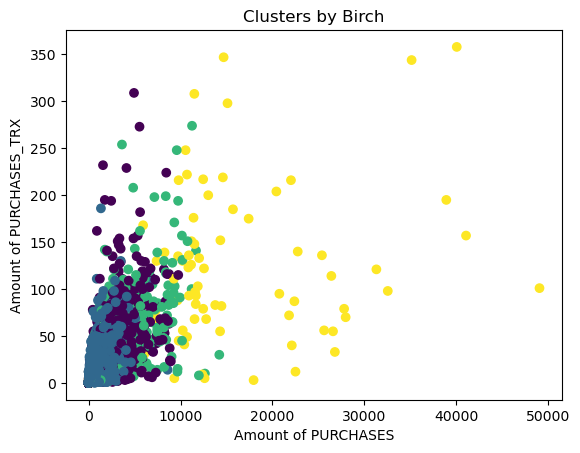

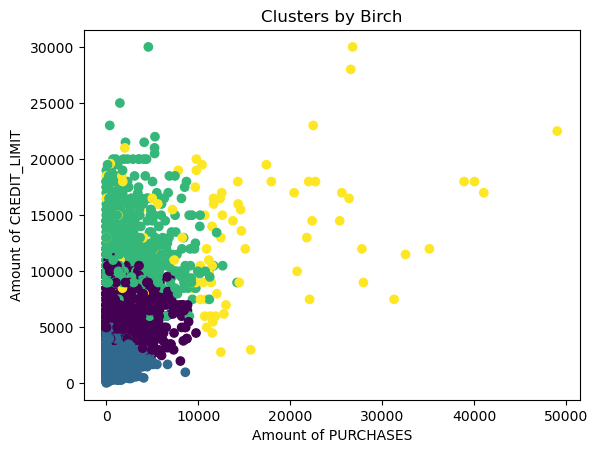

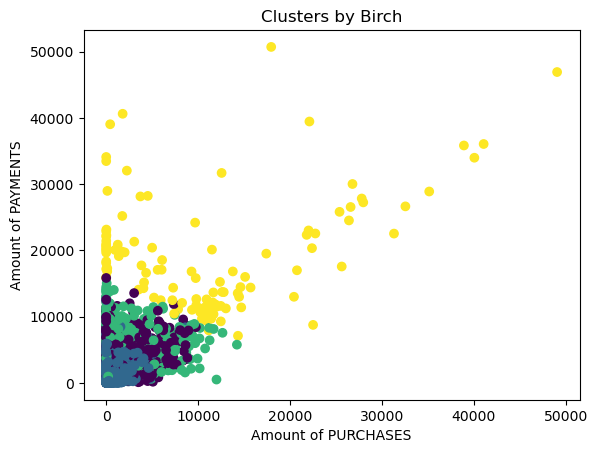

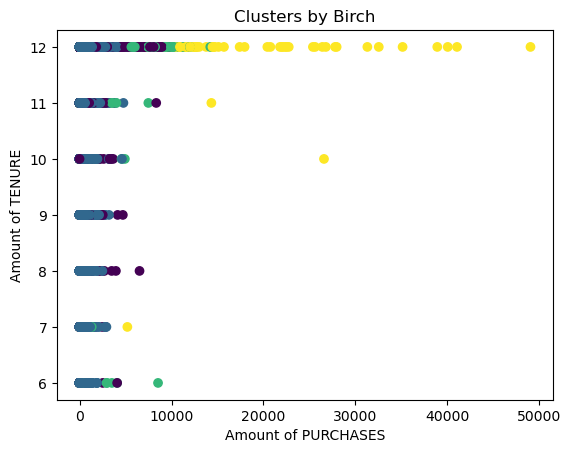

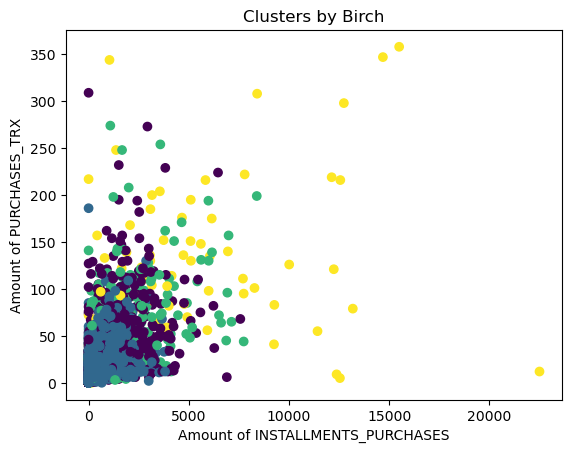

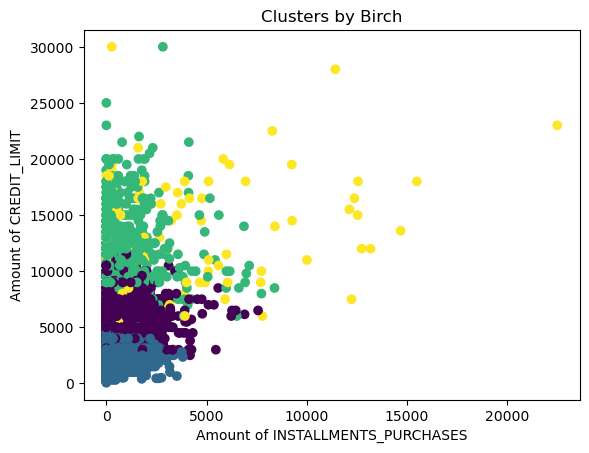

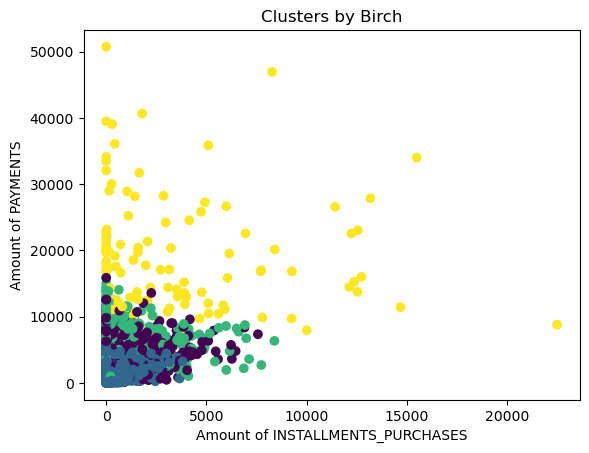

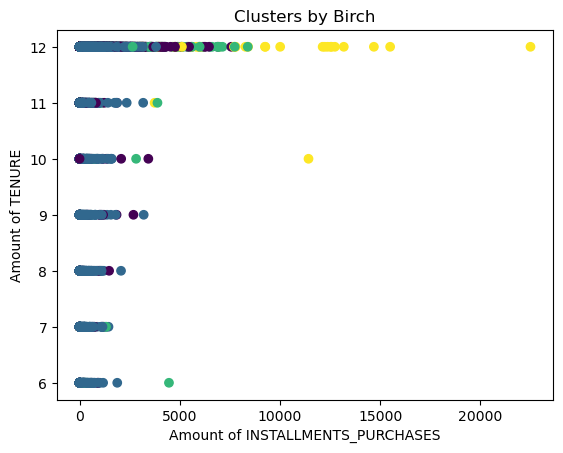

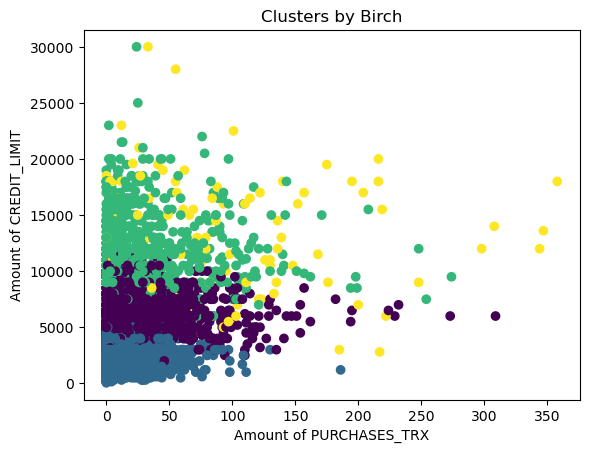

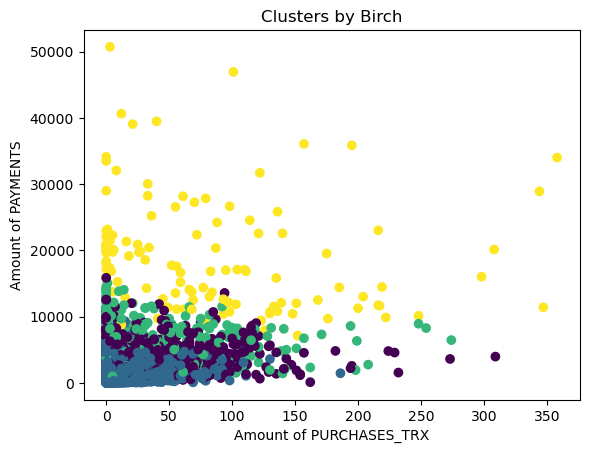

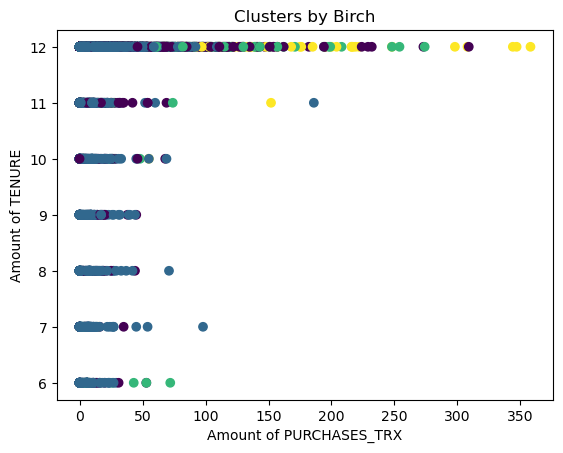

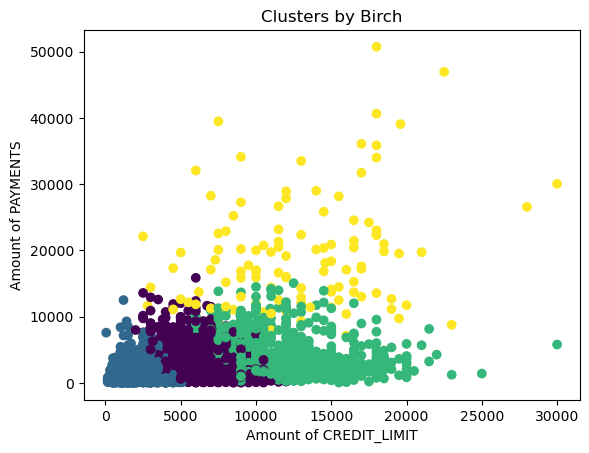

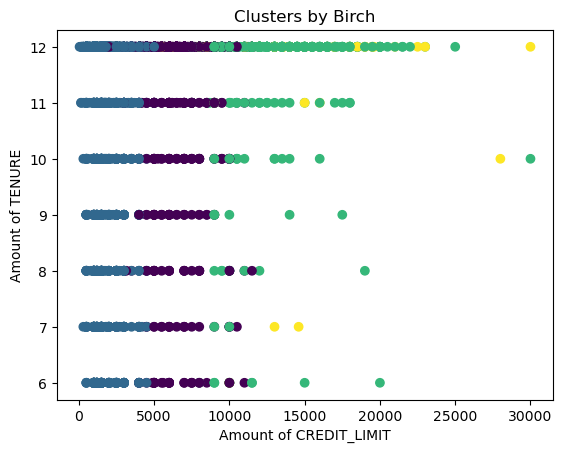

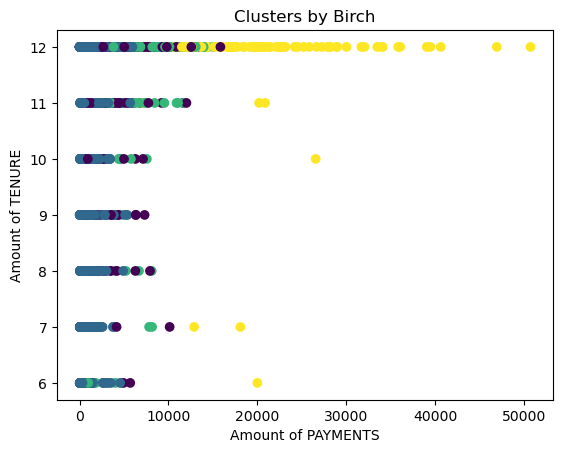

In [16]:
best_model = None
worst_model = None
best_accuracy = 0
worst_accuracy = 1

for name, model in methods.items():
    model.fit_predict(data[intresting_columns])
    # Визуализируем результаты кластеризации по двум признакам
    for i in range(len(intresting_columns)):
        for j in range(i+1, len(intresting_columns)):
            plt.scatter(data[intresting_columns[i]], data[intresting_columns[j]], c=clusters, cmap='viridis')
            plt.title("Clusters by %s" % name)
            plt.xlabel('Amount of %s' % intresting_columns[i])
            plt.ylabel('Amount of %s' % intresting_columns[j])
            plt.show()
    

### Вывод:

- Пролистав все графики на глаз можно сделать вывод, что симпатичнее всего кластеризация у Birch